### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import plotly.express as px

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install plotly

You should consider upgrading via the 'c:\users\jazi designs\anaconda3\python.exe -m pip install --upgrade pip' command.


### Import All Flight Years Data

In [13]:
afy = pd.read_csv("allFlights_year.csv")
afy

,Unnamed: 0,YEAR,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,FLIGHT_SPEED,SCHEDULED_DESTINATION,DESTINATION_DELAY
0,0,2015,1,1,AS,98,ANC,2015-01-01 00:05:00,-11.0,205.0,194.0,1448,447.835052,2015-01-01 03:30:00,-22.0
1,1,2015,1,1,AA,2336,LAX,2015-01-01 00:10:00,-8.0,280.0,279.0,2330,501.075269,2015-01-01 04:50:00,-9.0
2,2,2015,1,1,US,840,SFO,2015-01-01 00:20:00,-2.0,286.0,293.0,2296,470.170648,2015-01-01 05:06:00,5.0
3,3,2015,1,1,AA,258,LAX,2015-01-01 00:20:00,-5.0,285.0,281.0,2342,500.071174,2015-01-01 05:05:00,-9.0
4,4,2015,1,1,AS,135,SEA,2015-01-01 00:25:00,-1.0,235.0,215.0,1448,404.093023,2015-01-01 04:20:00,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5729190,2015,12,31,B6,688,LAX,2015-01-01 23:59:00,-4.0,320.0,298.0,2611,525.704698,2015-01-02 05:19:00,-26.0
5714004,5729191,2015,12,31,B6,745,JFK,2015-01-01 23:59:00,-4.0,227.0,215.0,1617,451.255814,2015-01-02 03:46:00,-16.0
5714005,5729192,2015,12,31,B6,1503,JFK,2015-01-01 23:59:00,-9.0,221.0,222.0,1598,431.891892,2015-01-02 03:40:00,-8.0
5714006,5729193,2015,12,31,B6,333,MCO,2015-01-01 23:59:00,-6.0,161.0,157.0,1189,454.394904,2015-01-02 02:40:00,-10.0


**Calculate Mean Overall Delay**

In [14]:
afy['DEPARTURE_DELAY'] = abs(afy["DEPARTURE_DELAY"])
afy['DESTINATION_DELAY'] = abs(afy["DESTINATION_DELAY"])
afy["Mean_Overall_Delay"] = afy["DEPARTURE_DELAY"] + afy["DESTINATION_DELAY"]

**Data preparation for boxplot**

In [15]:
# Convert to float 16
afy['Mean_Overall_Delay'] = afy["Mean_Overall_Delay"].astype("int16")

**Boxplot**

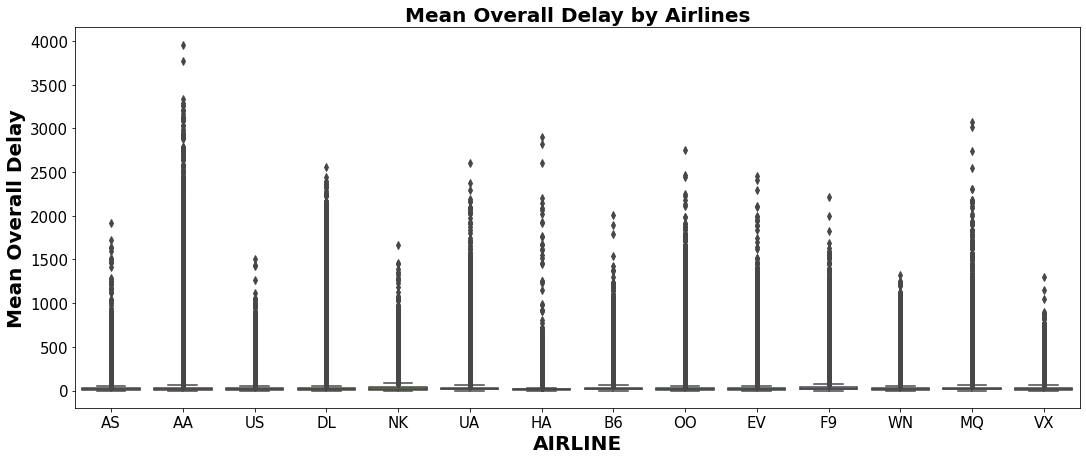

In [16]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "AIRLINE", y = "Mean_Overall_Delay", data = afy)
plt.title("Mean Overall Delay by Airlines", size = 20, weight = "bold")
plt.xlabel("AIRLINE", size = 20, weight = "bold")
plt.ylabel("Mean Overall Delay", size = 20, weight = "bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [18]:
cols=["YEAR","MONTH","DAY"]

afy['date'] = afy[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [19]:
afy["date"] = pd.to_datetime(afy["date"])

In [20]:
afy["MONTH"] = afy["date"].dt.month_name()

In [21]:
afy["DAY"] = afy["date"].dt.day_name()

In [32]:
pivot_delay = pd.pivot_table(index = "MONTH",
                             columns = "DAY",
                             values = "Mean_Overall_Delay",
                             data = afy)
pivot_delay

DAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
MONTH,,,,,,,
April,39.849643,35.522493,30.330005,27.757710,35.387773,27.003596,27.770735
August,32.530421,36.859898,34.467425,33.299010,39.158486,37.328770,31.264957
December,30.833249,44.237498,34.144111,42.306389,35.826002,40.968313,41.659633
February,35.504097,44.110655,35.655865,41.939860,40.802999,39.582099,33.376357
January,34.308079,39.813541,35.502059,43.574962,32.455036,34.837744,31.286258
July,33.162127,38.402282,35.843339,32.304322,37.562129,39.739214,41.354862
June,39.030165,44.742187,36.926274,38.119542,40.888452,44.745653,42.035940
March,36.643617,38.161578,30.094986,35.989673,35.600249,32.278070,31.413207
May,30.879042,42.683958,30.517408,38.647734,30.904578,36.167245,35.307154


In [34]:
pivot_delay = pivot_delay[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
pivot_delay

DAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
MONTH,,,,,,,
April,35.522493,27.003596,27.770735,35.387773,39.849643,30.330005,27.757710
August,36.859898,37.328770,31.264957,39.158486,32.530421,34.467425,33.299010
December,44.237498,40.968313,41.659633,35.826002,30.833249,34.144111,42.306389
February,44.110655,39.582099,33.376357,40.802999,35.504097,35.655865,41.939860
January,39.813541,34.837744,31.286258,32.455036,34.308079,35.502059,43.574962
July,38.402282,39.739214,41.354862,37.562129,33.162127,35.843339,32.304322
June,44.742187,44.745653,42.035940,40.888452,39.030165,36.926274,38.119542
March,38.161578,32.278070,31.413207,35.600249,36.643617,30.094986,35.989673
May,42.683958,36.167245,35.307154,30.904578,30.879042,30.517408,38.647734


In [35]:
new_index = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
pivot_delay = pivot_delay.reindex(new_index)

In [36]:
pivot_delay

DAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
MONTH,,,,,,,
January,39.813541,34.837744,31.286258,32.455036,34.308079,35.502059,43.574962
February,44.110655,39.582099,33.376357,40.802999,35.504097,35.655865,41.939860
March,38.161578,32.278070,31.413207,35.600249,36.643617,30.094986,35.989673
April,35.522493,27.003596,27.770735,35.387773,39.849643,30.330005,27.757710
May,42.683958,36.167245,35.307154,30.904578,30.879042,30.517408,38.647734
June,44.742187,44.745653,42.035940,40.888452,39.030165,36.926274,38.119542
July,38.402282,39.739214,41.354862,37.562129,33.162127,35.843339,32.304322
August,36.859898,37.328770,31.264957,39.158486,32.530421,34.467425,33.299010
September,25.765279,27.526707,25.967666,34.146784,31.063377,26.608329,26.398774


### Heatmap

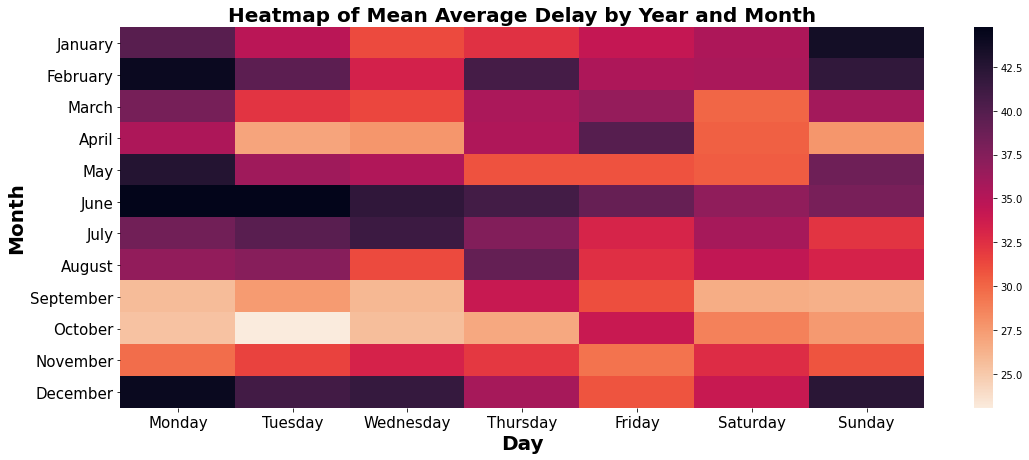

In [47]:
plt.figure(figsize = (18, 7))
sns.heatmap(pivot_delay, cmap ="rocket_r")
plt.title("Heatmap of Mean Average Delay by Year and Month", size = 20, weight = "bold")
plt.xlabel("Day", weight = "bold", size = 20)
plt.ylabel("Month", weight = "bold", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [49]:
afy["DISTANCE"] = afy["DISTANCE"].astype("int16")
afy["FLIGHT_SPEED"] = afy["FLIGHT_SPEED"].astype("float16")

In [54]:
afy["Mean_Overall_Delay"] = afy["Mean_Overall_Delay"].astype("int16")

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
def delay(x):
    if x >= 0 and x <= 15:
        return "low"
    elif x > 15 and x <= 30:
        return "mid"
    elif x > 30 and x <= 45:
        return "high"
    else:
        return "very high"
    
afy["Delay Type"] = afy["Mean_Overall_Delay"].apply(delay)

In [59]:
colors = {"low": "green", "mid": "yellow", "high": "pink", "very high": "red"}

<AxesSubplot:xlabel='DISTANCE', ylabel='FLIGHT_SPEED'>

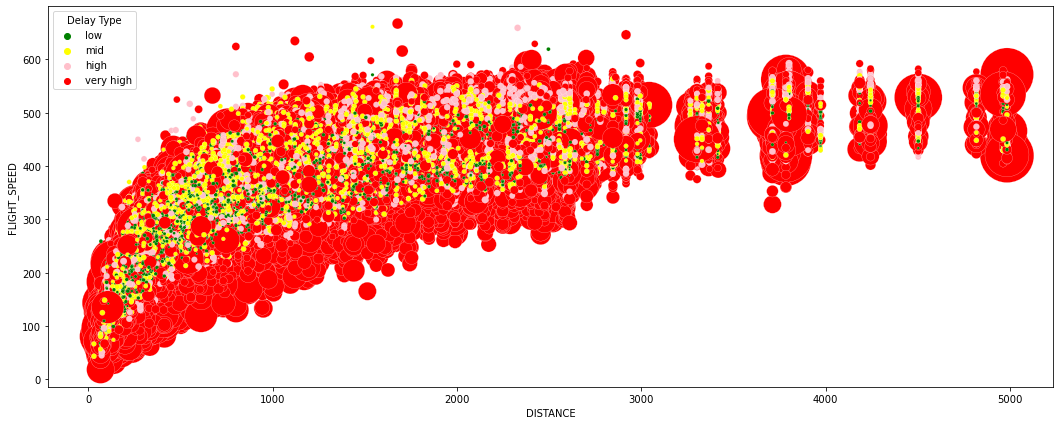

In [63]:
plt.figure(figsize = (18, 7))
sns.scatterplot(x = "DISTANCE",
                y = "FLIGHT_SPEED",
                s = afy["Mean_Overall_Delay"],
                hue = "Delay Type",
                hue_order = ["low", "mid", "high", "very high"],
                palette = colors,
                data = afy)